In [1]:
from qiskit_finance.circuit.library import NormalDistribution

REAL_DIST_NQUBITS = 3
real_circuit = NormalDistribution(REAL_DIST_NQUBITS, mu=0, sigma=0.15)
real_circuit = real_circuit.decompose().decompose().decompose()
real_circuit.draw()

┌───────────────────────┐                        ┌───┐»
q_0: ┤ multiplex1_reverse_dg ├────────────────────────┤ X ├»
     └──────┬─────────┬──────┘┌───┐┌────────────┐┌───┐└─┬─┘»
q_1: ───────┤ Ry(π/2) ├───────┤ X ├┤ Ry(0.8367) ├┤ X ├──■──»
           ┌┴─────────┴─┐     └─┬─┘└────────────┘└─┬─┘     »
q_2: ──────┤ R(π/2,π/2) ├───────■──────────────────■───────»
           └────────────┘                                  »
«     ┌───────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────┼──»
«                                        │  »
«q_2: ───────────────────────────────────■──»
«                                           »
«     ┌───────────────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────────────■──»
«                                                   »
«q_2: ──────────────────────────────────────────────»
«                                                   »
«     ┌───────────────────────────────┐┌───┐
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├
«     └───────────────────────────────┘└─┬─┘
«q_1: ───────────────────────────────────┼──
«                                        │  
«q_2: ───────────────────────────────────■──
«

In [2]:
from qiskit.circuit.library import TwoLocal

generator = TwoLocal(REAL_DIST_NQUBITS,
                     # Parameterized single qubit rotations
                     ['ry', 'rz'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure - all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g',
                     name='Generator')
generator = generator.decompose()
generator.draw()

┌────────────┐┌────────────┐      ┌────────────┐┌────────────┐»
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[3]) ├─■──■─┤ Ry(θ_g[6]) ├┤ Rz(θ_g[9]) ├»
     ├────────────┤├────────────┤ │  │ └────────────┘├────────────┤»
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[4]) ├─■──┼───────■───────┤ Ry(θ_g[7]) ├»
     ├────────────┤├────────────┤    │       │       ├────────────┤»
q_2: ┤ Ry(θ_g[2]) ├┤ Rz(θ_g[5]) ├────■───────■───────┤ Ry(θ_g[8]) ├»
     └────────────┘└────────────┘                    └────────────┘»
«                          ┌─────────────┐┌─────────────┐               
«q_0: ────────────────■──■─┤ Ry(θ_g[12]) ├┤ Rz(θ_g[15]) ├───────────────
«     ┌─────────────┐ │  │ └─────────────┘├─────────────┤┌─────────────┐
«q_1: ┤ Rz(θ_g[10]) ├─■──┼────────■───────┤ Ry(θ_g[13]) ├┤ Rz(θ_g[16]) ├
«     ├─────────────┤    │        │       ├─────────────┤├─────────────┤
«q_2: ┤ Rz(θ_g[11]) ├────■────────■───────┤ Ry(θ_g[14]) ├┤ Rz(θ_g[17]) ├
«     └─────────────┘                     └─────────────┘└─────────────┘

In [3]:
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit, Aer

disc_weights = ParameterVector('θ_d', 12)
discriminator = QuantumCircuit(REAL_DIST_NQUBITS, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)
discriminator.h(1)
discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)
discriminator.h(2)
discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(1,2)
discriminator.cx(0,2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)
discriminator.draw()

░ ┌───┐┌────────────┐┌────────────┐┌────────────┐                        »
q_0: ─░─┤ H ├┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■────────────────»
      ░ ├───┤├────────────┤├────────────┤├────────────┤       │                »
q_1: ─░─┤ H ├┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼────────────────»
      ░ ├───┤├────────────┤├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐»
q_2: ─░─┤ H ├┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├»
      ░ └───┘└────────────┘└────────────┘└────────────┘└───┘└───┘└────────────┘»
«                                   
«q_0: ──────────────────────────────
«                                   
«q_1: ──────────────────────────────
«     ┌─────────────┐┌─────────────┐
«q_2: ┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └─────────────┘└─────────────┘

In [4]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

In [5]:
gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)
gen_disc_circuit.draw()

┌────────────┐┌────────────┐      ┌────────────┐┌────────────┐»
q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[3]) ├─■──■─┤ Ry(θ_g[6]) ├┤ Rz(θ_g[9]) ├»
     ├────────────┤├────────────┤ │  │ └────────────┘├────────────┤»
q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[4]) ├─■──┼───────■───────┤ Ry(θ_g[7]) ├»
     ├────────────┤├────────────┤    │       │       ├────────────┤»
q_2: ┤ Ry(θ_g[2]) ├┤ Rz(θ_g[5]) ├────■───────■───────┤ Ry(θ_g[8]) ├»
     └────────────┘└────────────┘                    └────────────┘»
«                          ┌─────────────┐┌─────────────┐                ░ »
«q_0: ────────────────■──■─┤ Ry(θ_g[12]) ├┤ Rz(θ_g[15]) ├────────────────░─»
«     ┌─────────────┐ │  │ └─────────────┘├─────────────┤┌─────────────┐ ░ »
«q_1: ┤ Rz(θ_g[10]) ├─■──┼────────■───────┤ Ry(θ_g[13]) ├┤ Rz(θ_g[16]) ├─░─»
«     ├─────────────┤    │        │       ├─────────────┤├─────────────┤ ░ »
«q_2: ┤ Rz(θ_g[11]) ├────■────────■───────┤ Ry(θ_g[14]) ├┤ Rz(θ_g[17]) ├─░─»
«     └─────────────┘                     └─────────────┘└─────────────┘ ░ »
«     ┌───┐┌────────────┐┌────────────┐┌────────────┐                        »
«q_0: ┤ H ├┤ Rx(θ_d[0]) ├┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■────────────────»
«     ├───┤├────────────┤├────────────┤├────────────┤       │                »
«q_1: ┤ H ├┤ Rx(θ_d[3]) ├┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼────────────────»
«     ├───┤├────────────┤├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐»
«q_2: ┤ H ├┤ Rx(θ_d[6]) ├┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├»
«     └───┘└────────────┘└────────────┘└────────────┘└───┘└───┘└────────────┘»
«                                   
«q_0: ──────────────────────────────
«                                   
«q_1: ──────────────────────────────
«     ┌─────────────┐┌─────────────┐
«q_2: ┤ Ry(θ_d[10]) ├┤ Rz(θ_d[11]) ├
«     └─────────────┘└─────────────┘

In [6]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw()

┌───────────────────────┐                        ┌───┐»
q_0: ┤ multiplex1_reverse_dg ├────────────────────────┤ X ├»
     └──────┬─────────┬──────┘┌───┐┌────────────┐┌───┐└─┬─┘»
q_1: ───────┤ Ry(π/2) ├───────┤ X ├┤ Ry(0.8367) ├┤ X ├──■──»
           ┌┴─────────┴─┐     └─┬─┘└────────────┘└─┬─┘     »
q_2: ──────┤ R(π/2,π/2) ├───────■──────────────────■───────»
           └────────────┘                                  »
«     ┌───────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────┼──»
«                                        │  »
«q_2: ───────────────────────────────────■──»
«                                           »
«     ┌───────────────────────────────────────┐┌───┐»
«q_0: ┤ multiplex1_reverse_reverse_reverse_dg ├┤ X ├»
«     └───────────────────────────────────────┘└─┬─┘»
«q_1: ───────────────────────────────────────────■──»
«                                                   »
«q_2: ──────────────────────────────────────────────»
«                                                   »
«     ┌───────────────────────────────┐┌───┐ ░ ┌───┐┌────────────┐»
«q_0: ┤ multiplex1_reverse_reverse_dg ├┤ X ├─░─┤ H ├┤ Rx(θ_d[0]) ├»
«     └───────────────────────────────┘└─┬─┘ ░ ├───┤├────────────┤»
«q_1: ───────────────────────────────────┼───░─┤ H ├┤ Rx(θ_d[3]) ├»
«                                        │   ░ ├───┤├────────────┤»
«q_2: ───────────────────────────────────■───░─┤ H ├┤ Rx(θ_d[6]) ├»
«                                            ░ └───┘└────────────┘»
«     ┌────────────┐┌────────────┐                                       »
«q_0: ┤ Ry(θ_d[1]) ├┤ Rz(θ_d[2]) ├───────■───────────────────────────────»
«     ├────────────┤├────────────┤       │                               »
«q_1: ┤ Ry(θ_d[4]) ├┤ Rz(θ_d[5]) ├──■────┼───────────────────────────────»
«     ├────────────┤├────────────┤┌─┴─┐┌─┴─┐┌────────────┐┌─────────────┐»
«q_2: ┤ Ry(θ_d[7]) ├┤ Rz(θ_d[8]) ├┤ X ├┤ X ├┤ Rx(θ_d[9]) ├┤ Ry(θ_d[10]) ├»
«     └────────────┘└────────────┘└───┘└───┘└────────────┘└─────────────┘»
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«     ┌─────────────┐
«q_2: ┤ Rz(θ_d[11]) ├
«     └─────────────┘

In [7]:
from qiskit.opflow import (StateFn, PauliSumOp, Gradient, AerPauliExpectation)
from qiskit_machine_learning.neural_networks import OpflowQNN
from qiskit.utils import QuantumInstance

expval = AerPauliExpectation()  # method to calculcate expectation values
gradient = Gradient()
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))
# Circuit wave function
gen_disc_sfn = StateFn(gen_disc_circuit)
real_disc_sfn = StateFn(real_disc_circuit)
# construct operator to retrieve Pauli Z expval of the last qubit
H1 = StateFn(PauliSumOp.from_list([('ZII', 1.0)]))
# combine operator and circuit to objective function
gendisc_op = ~H1 @ gen_disc_sfn
realdisc_op = ~H1  @ real_disc_sfn

In [8]:
# construct OpflowQNN with the two operators, the input parameters,
# the weight parameters, the expected value, and quantum instance.
# |fake> => |0> => 1 ; |real> => |1> => -1
gen_opqnn = OpflowQNN(gendisc_op,
                      # input parameters (discriminator weights)
                      gen_disc_circuit.parameters[:N_DPARAMS],
                      # differentiable weights (generator weights)
                      gen_disc_circuit.parameters[N_DPARAMS:],
                      expval,
                      gradient,
                      qi_sv) # gen wants to to minimize this expval
disc_fake_opqnn = OpflowQNN(gendisc_op,
                            # input parameters (generator weights)
                            gen_disc_circuit.parameters[N_DPARAMS:],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval,
                            gradient,
                            qi_sv) # disc wants to maximize this expval
disc_real_opqnn = OpflowQNN(realdisc_op,
                            [],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval,
                            gradient,
                            qi_sv) # disc wants to minimize this expval

In [10]:
import numpy as np
import tensorflow as tf

### START
init_gen_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                high=np.pi,
                                                size=(N_GPARAMS)))
init_disc_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                 high=np.pi,
                                                 size=(N_DPARAMS)))
gen_params = init_gen_params
disc_params = init_disc_params
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

2022-09-09 23:35:57.811922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-09 23:35:58.155689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-09 23:35:58.155736: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-09 23:35:58.201615: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-09 23:35:59.214872: W tensorflow/stream_executor/platform/de

In [11]:
# We'll use Statevector to retrieve statevector of given circuit
from qiskit.quantum_info import Statevector

def generator_cost(gen_params):
    """Generator cost function for the optimizer to minimize."""
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    state_probs = Statevector(gen_disc_circuit
                              .bind_parameters(curr_params)
                             ).probabilities()
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(state_probs[0b100:])
    cost = -prob_fake_true
    return cost

def discriminator_cost(disc_params):
    """Discriminator cost function for the optimizer to minimize."""
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    gendisc_probs = Statevector(gen_disc_circuit
                                .bind_parameters(curr_params)
                               ).probabilities()
    realdisc_probs = Statevector(real_disc_circuit.
                                 bind_parameters(disc_params.numpy())
                                ).probabilities()
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(gendisc_probs[0b100:])
    # Get total prob of measuring |1> on q2
    prob_real_true = np.sum(realdisc_probs[0b100:])
    cost = prob_fake_true - prob_real_true
    return cost

def calculate_kl_div(model_distribution: dict, target_distribution: dict):
    """Gauge model performance using Kullback Leibler Divergence"""
    kl_div = 0
    for bitstring, p_data in target_distribution.items():
        if np.isclose(p_data, 0, atol=1e-8):
            continue
        if bitstring in model_distribution.keys():
            kl_div += (p_data * np.log(p_data)
                 - p_data * np.log(model_distribution[bitstring]))
        else:
            kl_div += p_data * np.log(p_data) - p_data * np.log(1e-6)
    return kl_div

In [12]:
import pickle

best_gen_params = init_gen_params
gloss, dloss, kl_div = [], [], []
TABLE_HEADERS = "Epoch | Gen. cost | Discrim. cost | KL Div | New best? |"
print(TABLE_HEADERS)
for epoch in range(300):
    D_STEPS = 5
    #--- Quantum discriminator parameter update ---#
    for disc_train_step in range(D_STEPS):
        grad_dcost_fake = disc_fake_opqnn.backward(gen_params,
                                                   disc_params)[1][0,0]
        grad_dcost_real = disc_real_opqnn.backward([],
                                                   disc_params)[1][0,0]
        grad_dcost = grad_dcost_real - grad_dcost_fake # as above
        grad_dcost = tf.convert_to_tensor(grad_dcost)
        # update disc_params
        discriminator_optimizer.apply_gradients(zip([grad_dcost],
                                                    [disc_params]))
        if disc_train_step % D_STEPS == 0:
            dloss.append(discriminator_cost(disc_params))

    #--- Quantum generator parameter update ---#
    for gen_train_step in range(1):
        # as formulated above
        grad_gcost = gen_opqnn.backward(disc_params,
                                        gen_params)[1][0,0]
        grad_gcost = tf.convert_to_tensor(grad_gcost)
        # update gen_params
        generator_optimizer.apply_gradients(zip([grad_gcost],
                                                [gen_params]))
        gloss.append(generator_cost(gen_params))

    #--- Track KL and save best performing generator weights ---#
    # Create test circuit with updated gen parameters
    gen_checkpoint_circuit = generator.bind_parameters(gen_params.numpy())
    # Retrieve probability distribution of current generator
    gen_prob_dict = Statevector(gen_checkpoint_circuit
                               ).probabilities_dict()
    # Constant real probability distribution
    real_prob_dict = Statevector(real_circuit).probabilities_dict()
    current_kl = calculate_kl_div(gen_prob_dict, real_prob_dict)
    kl_div.append(current_kl)
    new_best = (np.min(kl_div) == current_kl)
    if new_best:
        # Store new best generator weights
        # serialize & deserialize to just zero links
        best_gen_params = pickle.loads(pickle.dumps(gen_params))
    if epoch % 30 == 0:
        # print table
        for header, val in zip(TABLE_HEADERS.split('|'),
                              (epoch, gloss[-1], dloss[-1],
                               kl_div[-1], new_best)):
            print(f"{val:.3g} ".rjust(len(header)), end="|")
        print()

Epoch | Gen. cost | Discrim. cost | KL Div | New best? |
    0 |    -0.299 |        -0.138 |  0.546 |         1 |
   30 |    -0.169 |        -0.652 |  0.917 |         0 |
   60 |    -0.257 |        -0.381 |  0.997 |         0 |
   90 |    -0.483 |        -0.361 |   1.03 |         0 |
  120 |    -0.482 |        -0.414 |    1.3 |         0 |
  150 |    -0.155 |        -0.719 |  0.853 |         0 |
  180 |     -0.46 |        -0.332 |  0.445 |         0 |
  210 |    -0.306 |        -0.579 |   0.46 |         0 |
  240 |    -0.295 |        -0.626 |  0.308 |         0 |
  270 |    -0.189 |        -0.557 |  0.609 |         0 |


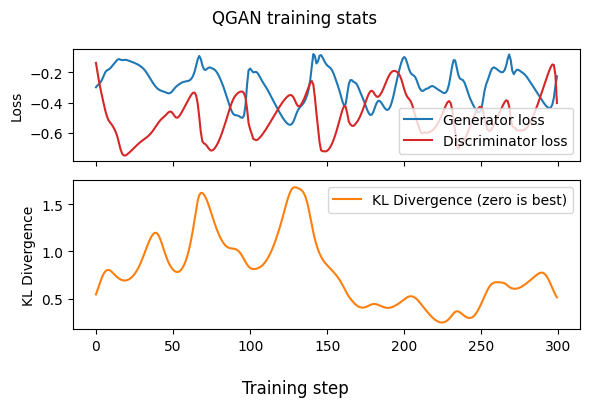

In [13]:
import matplotlib.pyplot as plt
fig, (loss, kl) = plt.subplots(2, sharex=True,
                               gridspec_kw={'height_ratios': [0.75, 1]},
                               figsize=(6,4))
fig.suptitle('QGAN training stats')
fig.supxlabel('Training step')
loss.plot(range(len(gloss)), gloss, label="Generator loss")
loss.plot(range(len(dloss)), dloss, label="Discriminator loss",
          color="C3")
loss.legend()
loss.set(ylabel='Loss')
kl.plot(range(len(kl_div)), kl_div, label="KL Divergence (zero is best)",
        color="C1")
kl.set(ylabel='KL Divergence')
kl.legend()
fig.tight_layout();

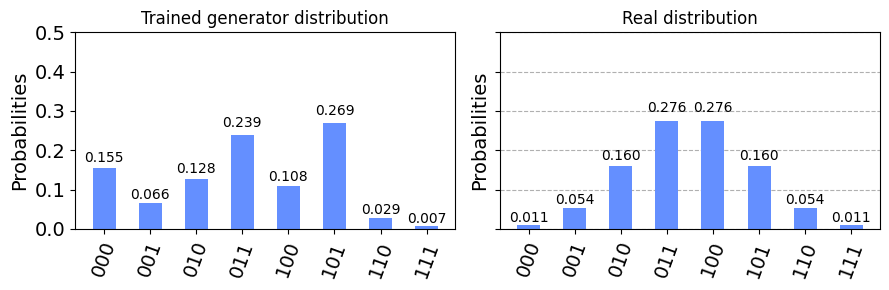

In [14]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Create test circuit with new parameters
gen_checkpoint_circuit = generator.bind_parameters(best_gen_params.numpy())
gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict()
real_prob_dict = Statevector(real_circuit).probabilities_dict() # constant
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,3))
plot_histogram(gen_prob_dict, ax=ax1)
ax1.set_title("Trained generator distribution")
plot_histogram(real_prob_dict, ax=ax2)
ax2.set_title("Real distribution")
ax2.set_ylim([0,.5])
fig.tight_layout()